# WeatherPy

### Analysis
-  Trend 1: The temperature is, of course, higher toward the equator and lower as you go further away from the equator. 
-  Trend 2: There’s no clear trend between latitude and humidity/cloudiness. 
-  Trend 3: It is rare for locations to have high wind speeds, as most places are below 10 mph. 

In [1]:
import json
import requests
import csv
import openweathermapy as ow
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from citipy import citipy
from config import api_key

## Generate Cities List

In [2]:
# Build a list of cities
cities = []

# Make a list of random lats, lngs values
for x in range(10): 
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lats_lngs = zip(lats, lngs)

# Make a for loop to get cities by lats, lngs
for lat, lon in lats_lngs:
    city = citipy.nearest_city(lat, lon)
    city = city.city_name
    
    if city not in cities:
        cities.append(city)

print(len(cities))

619


## Perform API Calls

In [3]:
# Print the list to make sure it works
print("Beginning Data Retrieval")
print("-" * 30)

row_count = 1

# Create a list to hold the info parsed 
city_data = []

# Loop through to get the info per city 
for city in cities:
    
    # Create the endpoint URL
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    
    params = {
        "units": "IMPERIAL",  
        "APPID": api_key, 
        "q": city
    }
    
    # Run requests to get the JSON files
    city_response = requests.get(base_url, params=params)
    
    # Print the list of URLS to make sure the loop works
    print(f"Processing Record {row_count} | {city}")
    print(city_response.url)
    row_count += 1
    
    # Use try/except to skip any cities with errors 
    try: 
        city_response_json = city_response.json()
        city_cloudiness = city_response_json["clouds"]["all"]
        country = city_response_json["sys"]["country"]
        city_date = city_response_json["dt"]
        city_humidity = city_response_json["main"]["humidity"]
        city_lat = city_response_json["coord"]["lat"]
        city_lng = city_response_json["coord"]["lon"]
        city_max_temp = city_response_json["main"]["temp_max"]
        city_wind_speed = city_response_json["wind"]["speed"]
        
        # Append the list to a single dictionary for each parameter 
        city_data.append({"City": city, 
                          "Cloudiness": city_cloudiness, 
                          "Country": country, 
                          "Date": city_date, 
                          "Humidity": city_humidity, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp, 
                          "Wind Speed": city_wind_speed})
        
    except KeyError:
        print("City not found. Skipping...")

print("-" * 30)
print("Data Retrieval Complete")
print("-" * 30)

Beginning Data Retrieval
------------------------------
Processing Record 1 | moose factory
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=moose+factory
City not found. Skipping...
Processing Record 2 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=vaitupu
City not found. Skipping...
Processing Record 3 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=meulaboh
Processing Record 4 | albany
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=albany
Processing Record 5 | manavalakurichi
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=manavalakurichi
Processing Record 6 | mataura
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=mataura
Processing Rec

Processing Record 56 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=chokurdakh
Processing Record 57 | olafsvik
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=olafsvik
Processing Record 58 | cheuskiny
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=cheuskiny
City not found. Skipping...
Processing Record 59 | yumen
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=yumen
Processing Record 60 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=tuktoyaktuk
Processing Record 61 | barrow
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=barrow
Processing Record 62 | vung tau
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9

Processing Record 112 | castro
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=castro
Processing Record 113 | namatanai
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=namatanai
Processing Record 114 | amudat
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=amudat
Processing Record 115 | santa cruz de la palma
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=santa+cruz+de+la+palma
Processing Record 116 | bambanglipuro
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=bambanglipuro
Processing Record 117 | cardston
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=cardston
Processing Record 118 | sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 167 | lata
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=lata
Processing Record 168 | pevek
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=pevek
Processing Record 169 | santa rosalia
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=santa+rosalia
Processing Record 170 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=sao+filipe
Processing Record 171 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=tsihombe
Processing Record 172 | thinadhoo
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=thinadhoo
Processing Record 173 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1d

Processing Record 223 | keetmanshoop
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=keetmanshoop
Processing Record 224 | tacuarembo
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=tacuarembo
Processing Record 225 | neiafu
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=neiafu
Processing Record 226 | haines junction
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=haines+junction
Processing Record 227 | ardahan
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=ardahan
Processing Record 228 | warqla
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=warqla
City not found. Skipping...
Processing Record 229 | kalia
http://api.openweathermap.org/data/2.5/weather?units=IMP

Processing Record 279 | nuuk
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=nuuk
Processing Record 280 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=aklavik
Processing Record 281 | santa luzia
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=santa+luzia
Processing Record 282 | yeppoon
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=yeppoon
Processing Record 283 | zheleznodorozhnyy
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=zheleznodorozhnyy
Processing Record 284 | guangyuan
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=guangyuan
Processing Record 285 | saint-francois
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60

Processing Record 334 | coquimbo
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=coquimbo
Processing Record 335 | shumskiy
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=shumskiy
Processing Record 336 | tsienyane
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=tsienyane
City not found. Skipping...
Processing Record 337 | aleppo
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=aleppo
Processing Record 338 | roza
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=roza
Processing Record 339 | soyo
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=soyo
City not found. Skipping...
Processing Record 340 | kamenskoye
http://api.openweathermap.org/data/2.5/weather?units=IMPE

Processing Record 389 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=hasaki
Processing Record 390 | hammond
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=hammond
Processing Record 391 | dayong
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=dayong
City not found. Skipping...
Processing Record 392 | ngukurr
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=ngukurr
City not found. Skipping...
Processing Record 393 | kamenka
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=kamenka
Processing Record 394 | henties bay
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=henties+bay
City not found. Skipping...
Processing Record 395 | golden
http://api.openweatherm

Processing Record 445 | filadelfia
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=filadelfia
Processing Record 446 | auki
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=auki
Processing Record 447 | kilrush
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=kilrush
Processing Record 448 | jinchang
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=jinchang
Processing Record 449 | never
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=never
Processing Record 450 | yantongshan
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=yantongshan
Processing Record 451 | belyy yar
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q

Processing Record 502 | highview
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=highview
Processing Record 503 | riachao do jacuipe
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=riachao+do+jacuipe
Processing Record 504 | nuzvid
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=nuzvid
Processing Record 505 | tsumeb
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=tsumeb
Processing Record 506 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=hambantota
Processing Record 507 | eyl
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=eyl
Processing Record 508 | urumqi
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1dd

Processing Record 558 | sagua la grande
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=sagua+la+grande
Processing Record 559 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=lompoc
Processing Record 560 | yialos
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=yialos
City not found. Skipping...
Processing Record 561 | acarau
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=acarau
Processing Record 562 | dehloran
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=dehloran
Processing Record 563 | mamallapuram
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=mamallapuram
Processing Record 564 | champasak
http://api.openweathermap.org/data/2.5/weather?units=IMPER

Processing Record 613 | colares
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=colares
Processing Record 614 | beidao
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=beidao
Processing Record 615 | vila
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=vila
Processing Record 616 | hadejia
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=hadejia
Processing Record 617 | oranjestad
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=oranjestad
Processing Record 618 | ulaangom
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=ulaangom
Processing Record 619 | nara
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=87a4d9f60074ea85425e7f1ddedd5ea1&q=nara
City 

In [4]:
# Create a DataFrame with the information received 
city_data_pd = pd.DataFrame(city_data)
city_data_pd.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [5]:
# Display the City DataFrame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,meulaboh,64,ID,1511034946,100,4.14,96.13,76.83,2.24
1,albany,90,US,1511031540,48,42.65,-73.76,44.60,12.75
2,manavalakurichi,40,IN,1511031600,83,8.13,77.30,82.40,3.36
3,mataura,0,IN,1511034947,86,27.50,77.68,61.26,8.61
4,illoqqortoormiut,75,PT,1511033400,88,38.53,-28.64,68.00,1.12


## Latitude vs Temperature Plot

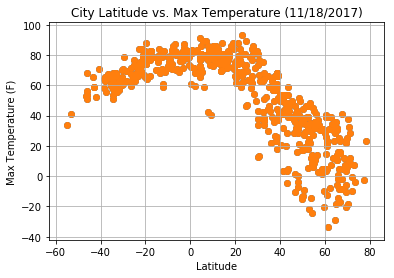

In [7]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Max Temp"], marker="o")
plt.title("City Latitude vs. Max Temperature (11/18/2017)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

## Latitude vs Humidity Plot

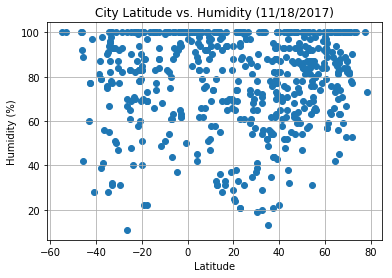

In [8]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Humidity"], marker="o")
plt.title("City Latitude vs. Humidity (11/18/2017)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

## Latitude vs Cloudiness Plot

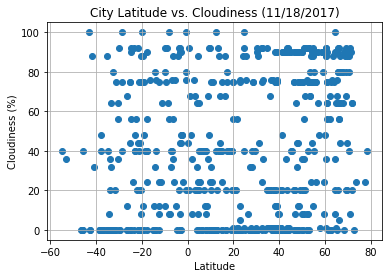

In [9]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Cloudiness"], marker="o")
plt.title("City Latitude vs. Cloudiness (11/18/2017)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

## Latitude vs Wind Speed Plot

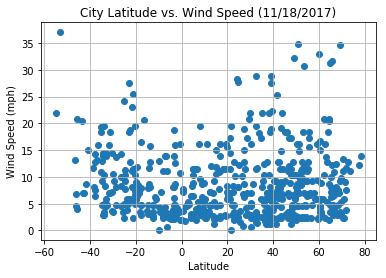

In [11]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Wind Speed"], marker="o")
plt.title("City Latitude vs. Wind Speed (11/18/2017)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()